In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
tf_device='/gpu:0'

In [1]:
import numpy as np
from glob import glob

from tensorflow.keras.layers import Input

from unets import get_unet
import matplotlib.pyplot as plt
%matplotlib inline

2021-08-26 12:57:59.466073: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


### 1. Luna Data

In [2]:
data_path = "/home/samsmu/Data/Lung/CT"
working_path = data_path + "/Temp/"

X_luna = np.load(working_path+"testImages.npy").astype(np.float32)
X_luna =  np.moveaxis(X_luna, 1,3)
X_luna = X_luna/X_luna.max()

In [5]:
im_height = 512
im_width = 512
input_img = Input((im_height, im_width, 1), name='img')
model = get_unet(input_img)
# load the best model
model.load_weights('model-nodules.h5')

In [6]:
# Evaluate on validation set (this must be equals to the best log_loss)
preds = model.predict(X_luna)

In [7]:
# Threshold predictions
preds_binary = (preds > 0.5).astype(np.uint8)

In [52]:
def plot_sample(X, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = np.random.randint(0, len(X))
    
    has_nodule = preds_binary[ix].sum()
    lung = X[ix, ..., 0]
    print(lung.shape)
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    ax[0,0].imshow(lung, cmap='gray')
    ax[0,0].set_title('Lung')
    if has_nodule:
        ax[0,0].contour(preds[ix].squeeze(), colors='b', levels=[0.5])

    mask = binary_preds[ix].squeeze()
    region = lung * mask
    ax[1,0].imshow(region, cmap = 'gray')
    ax[1,0].set_title('Nodule region')
    
    ax[0,1].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    ax[0,1].set_title('Nodule Predicted')
    

    ax[1,1].imshow(mask, vmin=0, vmax=1)
    ax[1,1].set_title('Nodule Predicted binary');

    
    return ix

(512, 512)


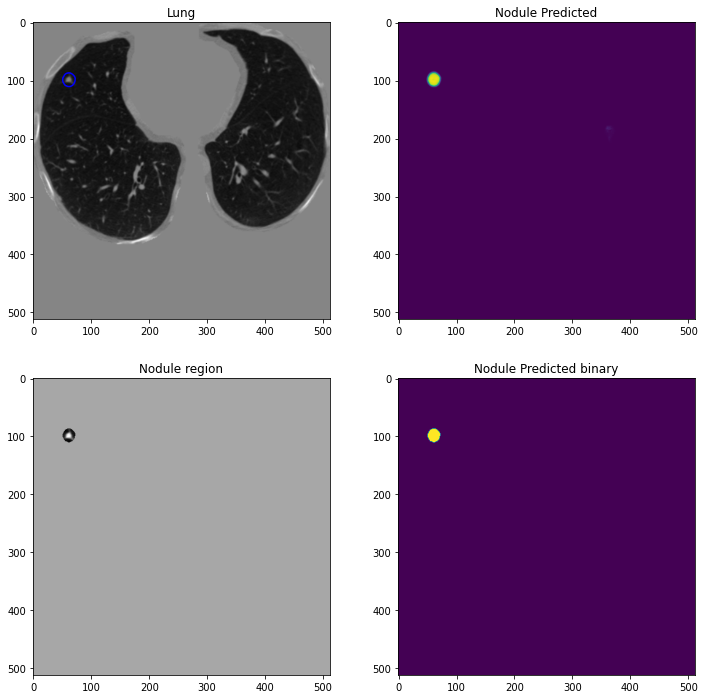

In [53]:
# Check if training data looks all right
ix = plot_sample(X_luna,  preds,  preds_binary)

In [10]:
from features import get_region_from_map, get_features_from_region

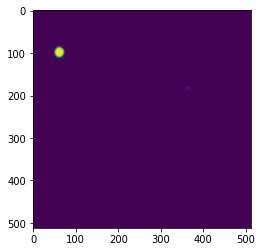

In [58]:
plt.imshow(preds[ix])

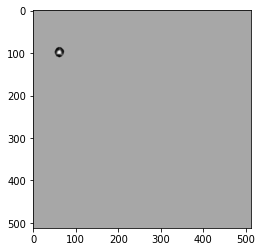

In [62]:
mask = (preds[ix] > 0.5).astype(np.uint8).squeeze()
lung_nodules  = X_luna[ix].squeeze() * mask
plt.imshow(lung_nodules, cmap = 'gray')

In [63]:
regions = get_region_from_map(lung_nodules)

## Добавить создание региона в подготовке признаков !!!